BOSTON HOUSING PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sys

In [2]:
# Carga del dataset sin encabezados y separando por espacios en blanco
df = pd.read_csv('data//housing.data', delim_whitespace = True, header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Explicación de cada columna:
CRIM – Tasa de criminalidad per cápita por zona.
ZN – Proporción de terrenos residenciales divididos en lotes de más de 25,000 pies cuadrados.
INDUS – Proporción de acres comerciales no residenciales por ciudad.
CHAS – Variable dummy (0 o 1) que indica si el tramo bordea el río Charles (1 = sí, 0 = no).
NOX – Concentración de óxidos de nitrógeno (NOx), una medida de la contaminación del aire (valor entre 0 y 1).
RM – Número promedio de habitaciones por vivienda.
AGE – Proporción de unidades ocupadas construidas antes de 1940.
DIS – Distancia ponderada a cinco centros de empleo en Boston.
RAD – Índice de accesibilidad a autopistas radiales.
TAX – Tasa de impuestos a la propiedad por $10,000.
PTRATIO – Relación alumno-profesor por ciudad.
B – 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de raza negra por ciudad.
LSTAT – Porcentaje de población de bajo estatus socioeconómico.
MEDV – Valor medio de las viviendas ocupadas por sus dueños (en miles de dólares).

In [4]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


EXPLORATORY DATA ANALYSYS (EDA)

Pasos para la correcta interpretacion de los datos

🔍 1. Distribución de los datos (mean, std, min, max)
Compara la media y la mediana (50%):
Si están muy alejadas, probablemente la variable esté sesgada (por ejemplo, CRIM tiene media 3.61 y mediana 0.25 → fuerte sesgo a la derecha). 
    La mayoría de los datos están concentrados en valores bajos.
    Pero hay algunos valores muy altos (outliers) que arrastran la media hacia la derecha.
    En un histograma, esto se ve como una cola larga hacia la derecha.
Observa la desviación estándar (std):
Te dice cuánta variabilidad hay. Si es muy alta respecto a la media, los datos están muy dispersos (CRIM, TAX y B son buenos ejemplos).

📊 2. Outliers (valores atípicos)
Compara los valores máximos con el percentil 75%:
Por ejemplo: CRIM tiene un valor máximo de 88.97 y su Q3 (75%) es 3.68, lo que sugiere que hay outliers fuertes.
Estas diferencias grandes indican que podrías necesitar normalización o transformaciones logarítmicas para algunos modelos.

📈 3. Importancia potencial de variables
Algunas variables como:
RM (número de habitaciones) tiene una relación conocida positiva con el valor de la vivienda (MEDV). Aumenta una aumenta tambien la otra.
LSTAT (porcentaje de bajos ingresos) tiende a tener una relación negativa con MEDV. Cuando aumenta la primera, la segunda disminuye.
PTRATIO, TAX, y NOX también podrían influir, y vale la pena analizarlos con gráficos de correlación o regresión.

🧱 4. Variables categóricas (como CHAS)
CHAS solo tiene valores 0 y 1 → es una variable dummy (binaria).
Siempre es buena idea revisar su distribución (df['CHAS'].value_counts()) para asegurarte de que haya suficientes ejemplos de cada categoría.

🧮 5. Escala de los datos
TAX, B, y CRIM están en escalas muy diferentes → esto afecta a los algoritmos sensibles a la escala (como regresión lineal, KNN, etc.).
Considera aplicar escalado (standardization o normalization) antes de entrenar modelos.

In [5]:
# Significado de las filas en S2
# 1. Distribución de los datos
# Importante para detectar si los datos están sesgados o si hay mucha variabilidad.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# 2. Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PcVIP\anaconda3\envs\ml_python\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


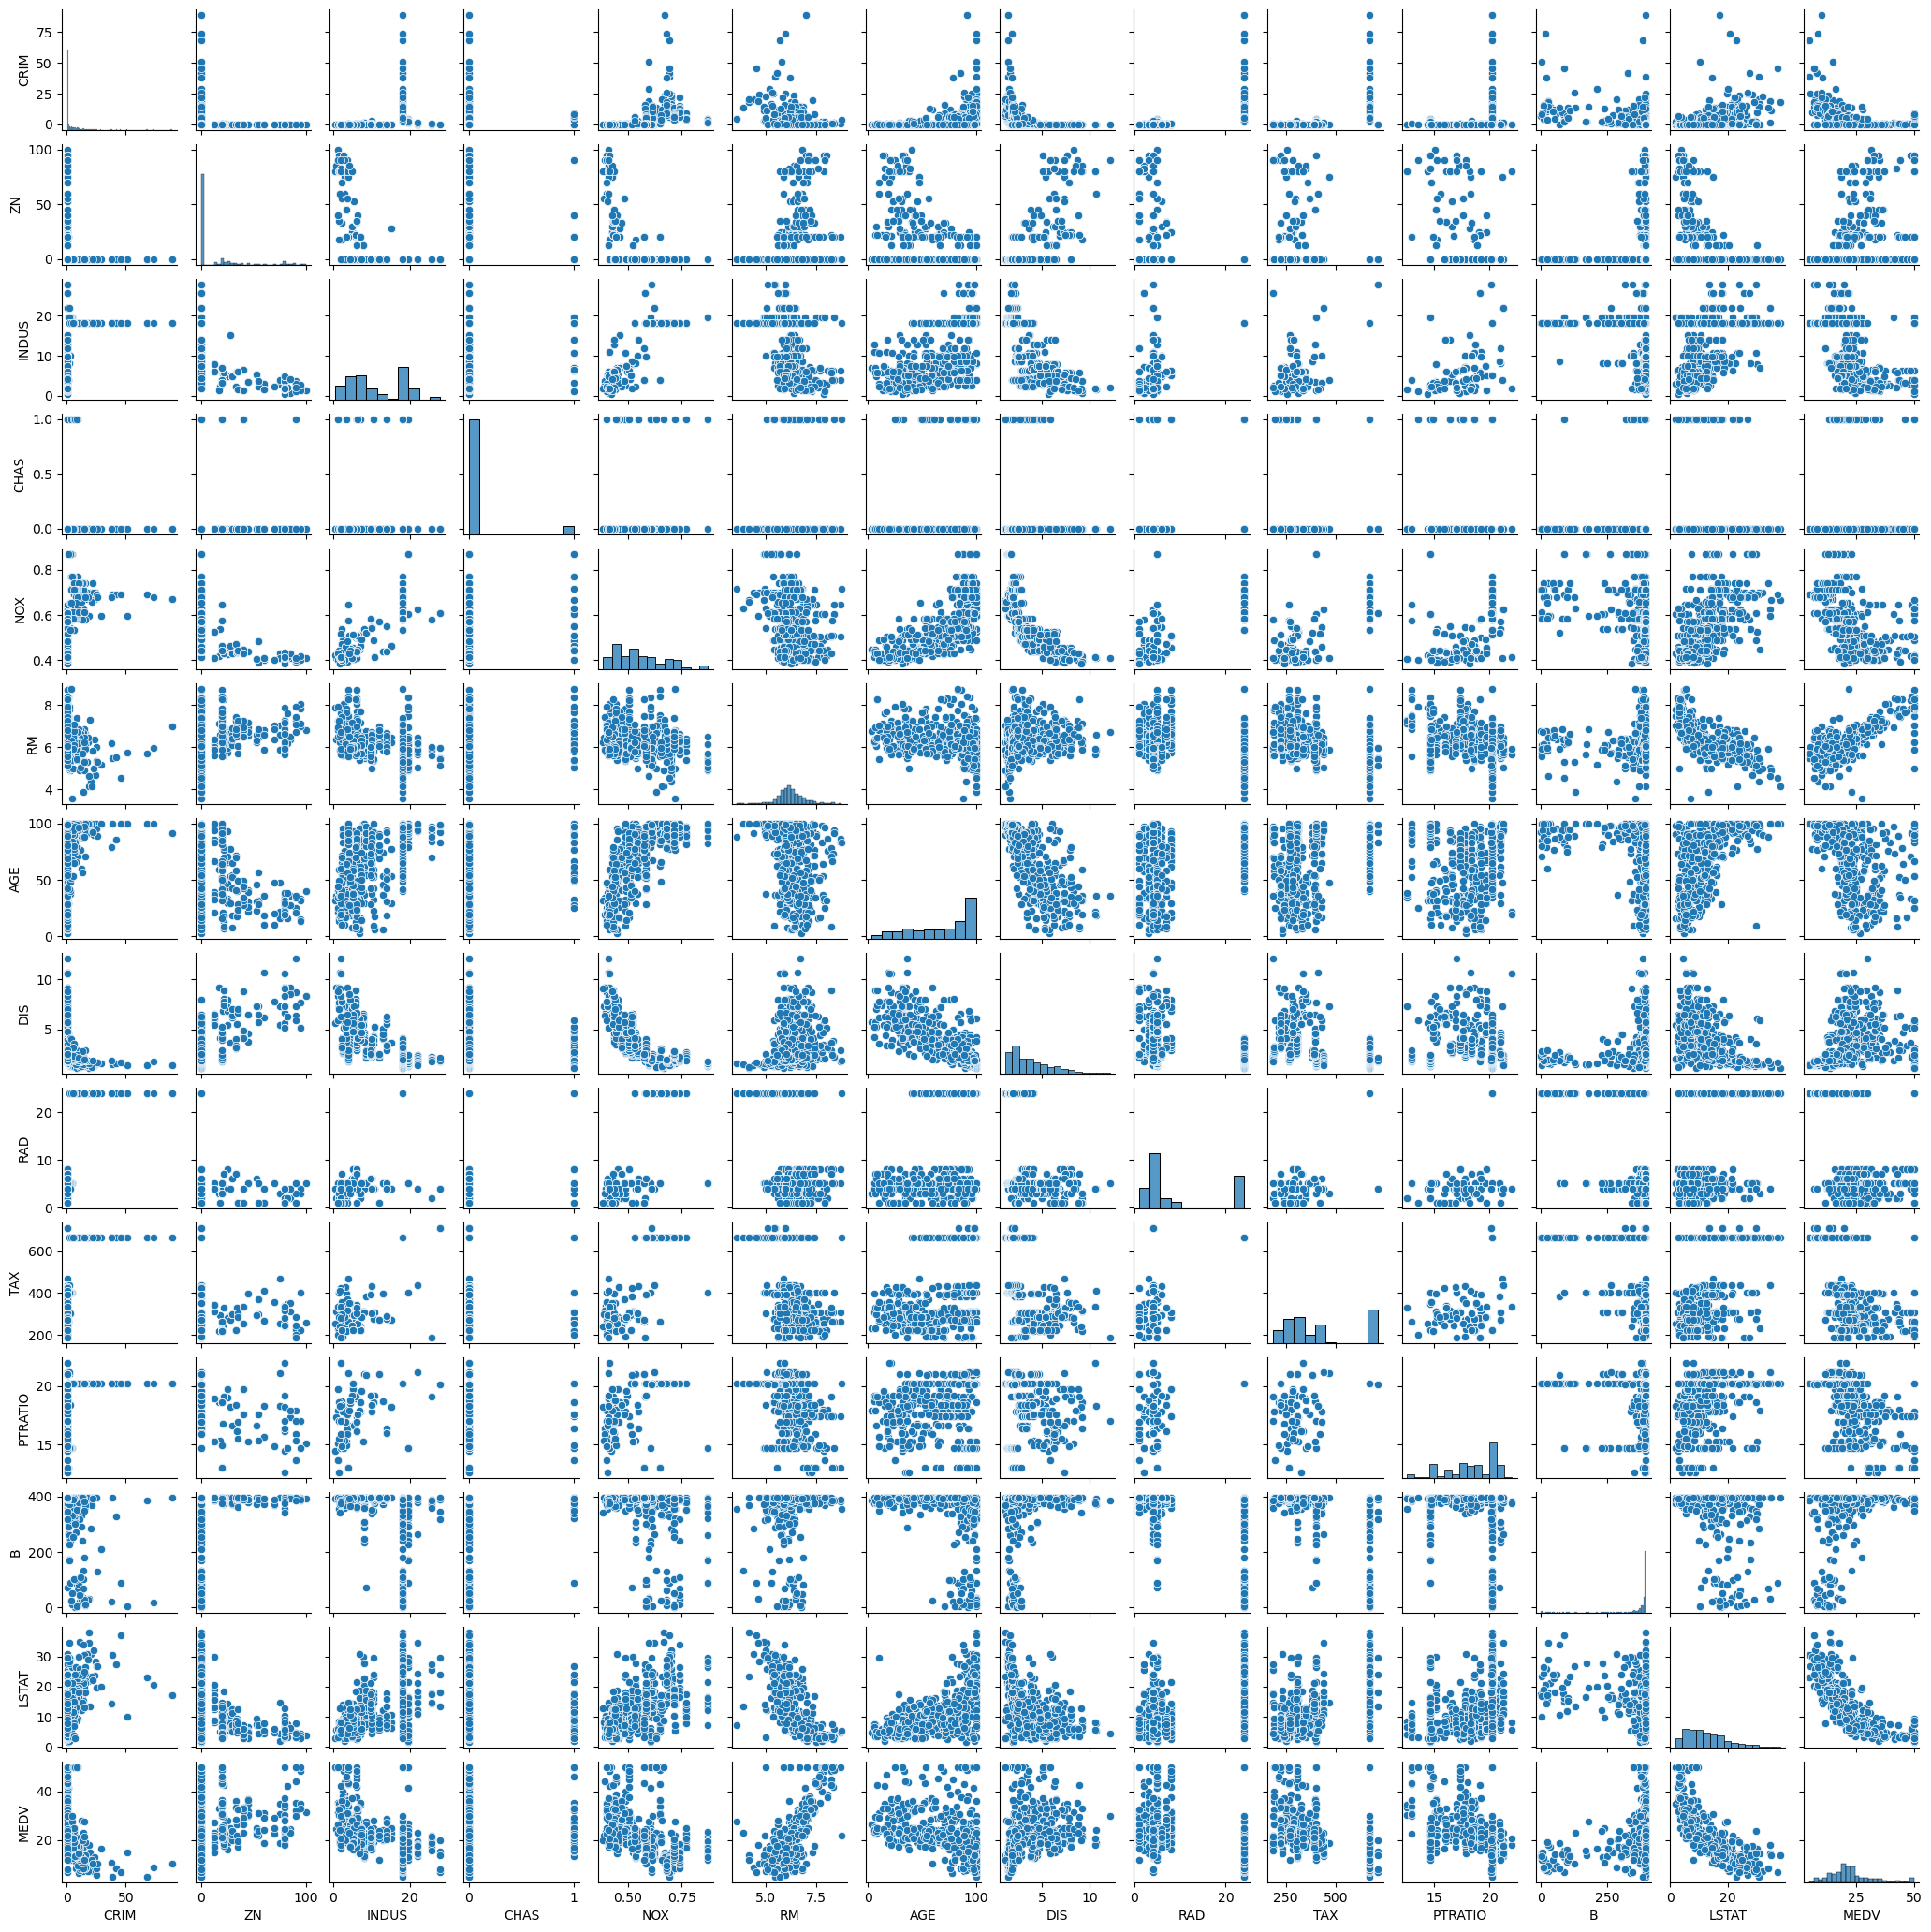

In [7]:
# 3. Visualización general de las relaciones entre variables con pairplot
# Este gráfico muestra relaciones entre todas las columnas, útil para detectar correlaciones y tendencias.
sns.pairplot(df, size = 1.5)
plt.show()

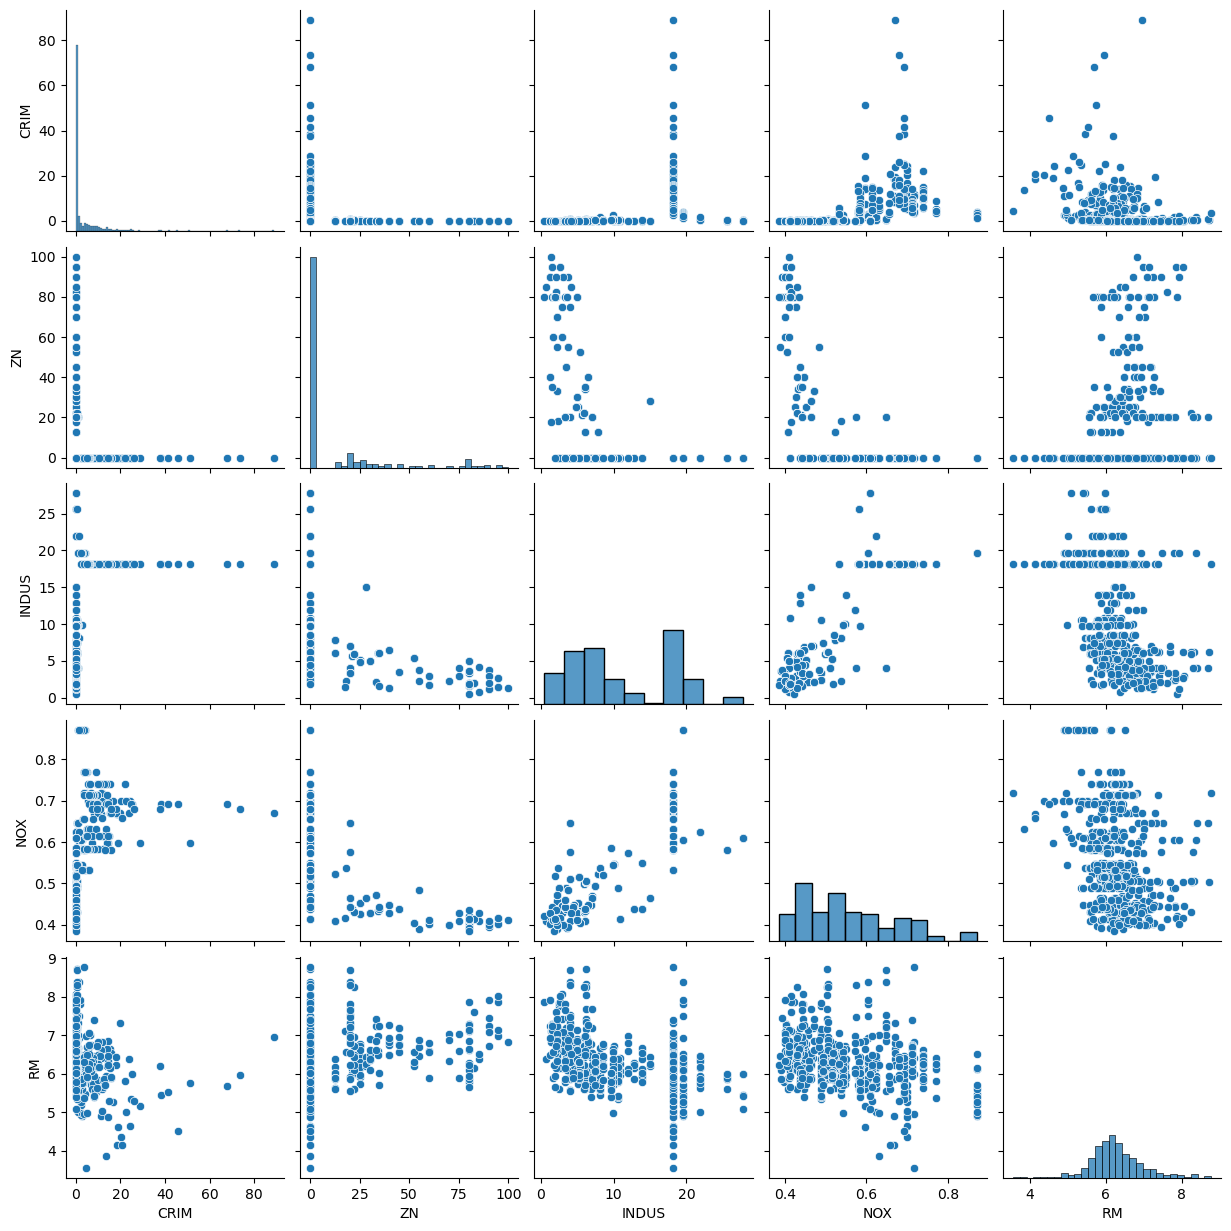

In [8]:
# 4. Estudio de algunas columnas específicas que pueden tener alta correlación con el precio
# Seleccionamos columnas de interés que pueden explicar bien 'MEDV' (precio)
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']
sns.pairplot(df[col_study], height = 2.5)
plt.show()

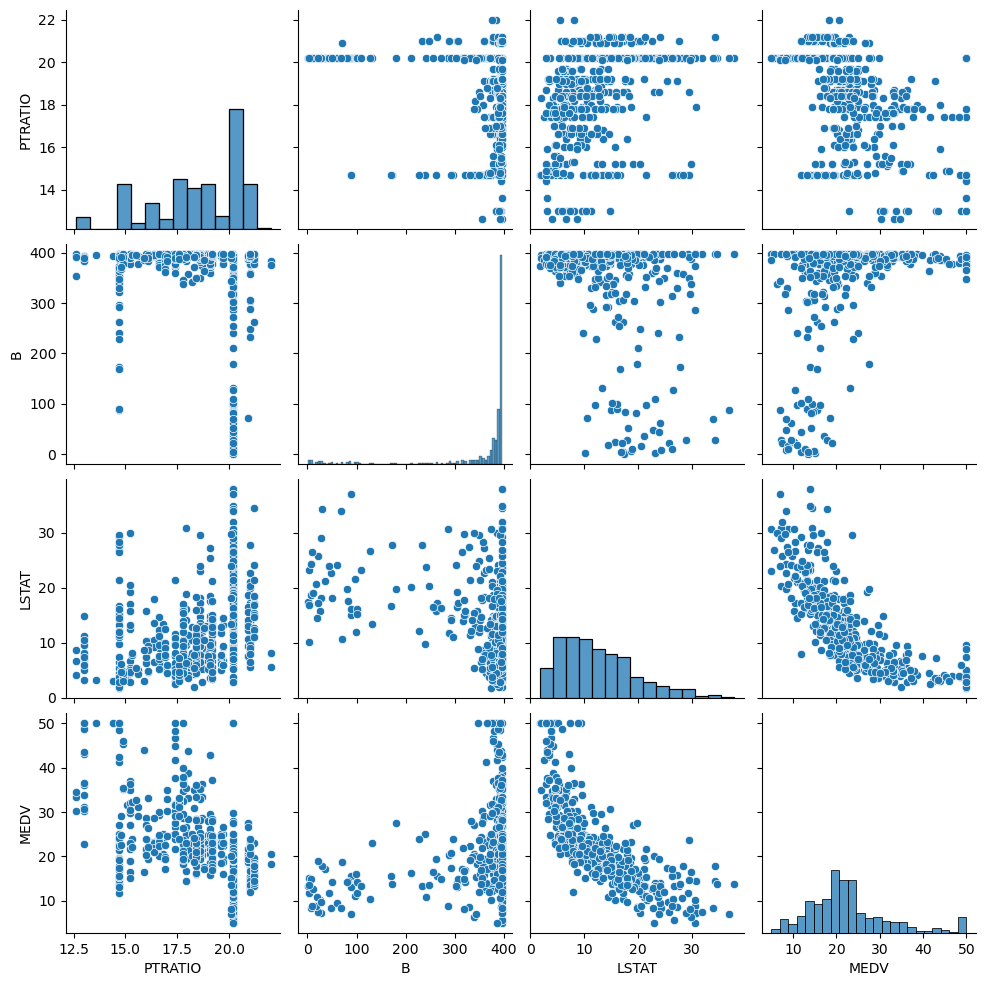

In [9]:
col_study2 = ['PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[col_study2], height = 2.5)
plt.show()

📉 1. LSTAT vs MEDV
Relación negativa clara y fuerte.
A medida que LSTAT (porcentaje de personas de bajo estatus económico) aumenta, el valor de la vivienda (MEDV) disminuye.
Se observa una forma de curva → podrías considerar aplicar una transformación polinómica o logarítmica en modelos más avanzados.

🧪 2. B vs MEDV
Relación algo difusa o débilmente positiva.
La mayoría de los datos están concentrados cerca de los valores máximos de B (~400), y su dispersión con MEDV no es clara.
Es probable que B no sea una variable predictora muy fuerte por sí sola.
Además, parece que tiene una distribución muy sesgada, lo que puede requerir normalización.

📚 3. PTRATIO vs MEDV
Relación ligeramente negativa.
A mayor relación alumno-profesor (PTRATIO), menor suele ser el valor medio de la vivienda (MEDV).
Aunque hay cierta dispersión, se nota una tendencia decreciente.

📊 Distribuciones individuales (diagonales del pairplot)
MEDV tiene una distribución asimétrica a la derecha, con un valor máximo claro de 50 (esto podría ser un techo artificial en el dataset).
LSTAT tiene forma asimétrica a la derecha también.
B tiene una distribución fuertemente sesgada, muchos valores agrupados cerca de 400.
PTRATIO tiene una distribución discreta o escalonada, ya que tiene pocos valores únicos.

📌 Conclusiones
LSTAT	Negativa fuerte	Muy útil para predicción
B	Débil o nula	Podría descartarse en modelos simples
PTRATIO	Negativa leve	Podría ser útil combinada con otras variables

CORRELATION ANALYSIS AND FEATURE SELECTION

In [10]:
pd.options.display.float_format = '{:,.3f}'.format # Cambia el numero de cifras que se presentan en la tabla
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


🎯 ¿Qué se busca aquí?
Se busca identificar qué variables están más correlacionadas con la variable objetivo MEDV (precio medio de la vivienda) para:
    Seleccionar las variables más útiles para predecir MEDV.
    Evitar variables que estén altamente correlacionadas entre sí (para prevenir multicolinealidad en modelos lineales).
    Tener una guía de qué relaciones explorar más a fondo con visualizaciones o transformaciones.

📘 Cómo leer la tabla:
Cada valor es el coeficiente de correlación de Pearson entre dos variables, que va de -1 a +1.
    +1: correlación positiva perfecta.
    -1: correlación negativa perfecta.
    0: no hay correlación lineal.
La última fila/columna (MEDV) es la más importante, porque indica cómo se relacionan las demás variables con el precio de la vivienda.

| Valor de la correlación         | Fuerza de la relación   | ¿Se considera útil?                                     |
| ------------------------------- | ----------------------- | ------------------------------------------------------- |
| **0.9 a 1.0** o **-0.9 a -1.0** | Muy fuerte              | ✅ Extremadamente útil, revisar si hay multicolinealidad |
| **0.7 a 0.9** o **-0.7 a -0.9** | Fuerte                  | ✅ Muy útil para predicción                              |
| **0.5 a 0.7** o **-0.5 a -0.7** | Moderada                | 👍 Útil, especialmente combinada con otras variables    |
| **0.3 a 0.5** o **-0.3 a -0.5** | Débil a moderada        | ⚠️ A veces útil, pero conviene revisar visualmente      |
| **0.0 a 0.3** o **-0.0 a -0.3** | Muy débil o inexistente | ❌ Normalmente se descarta                               |


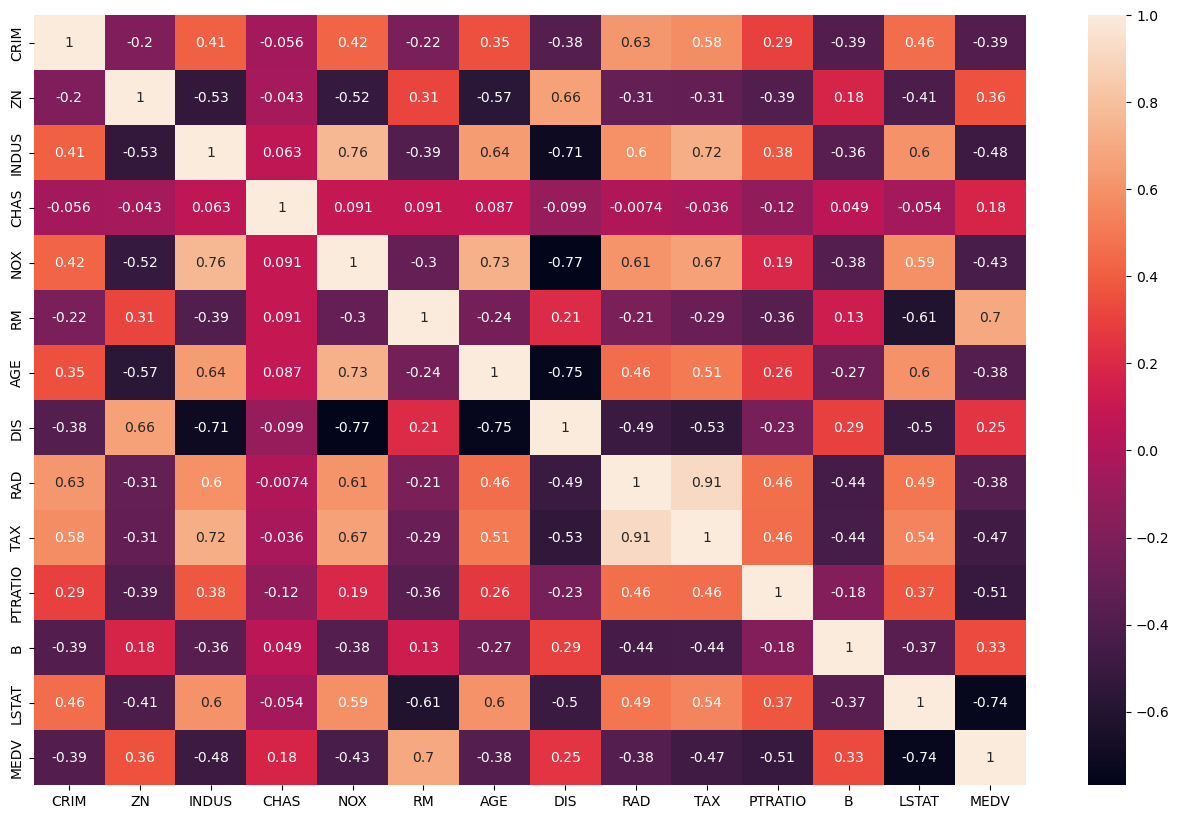

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

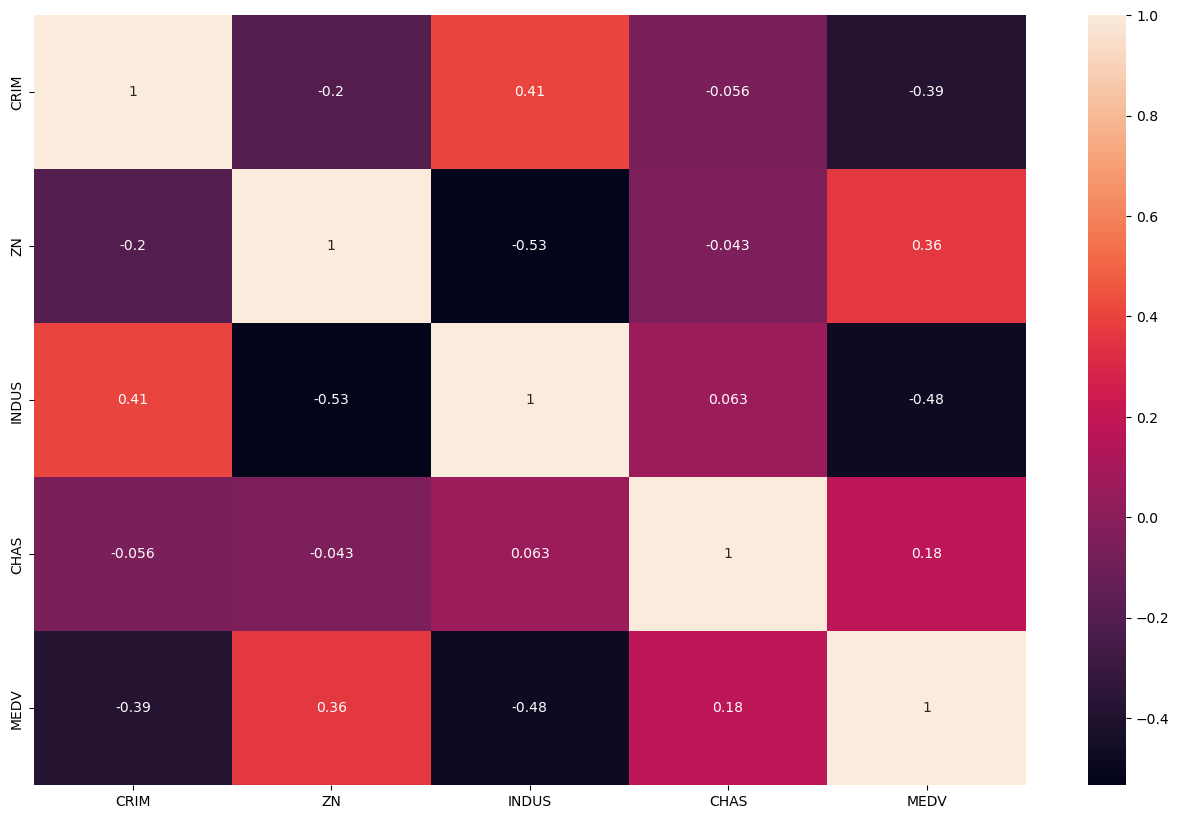

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot = True)
plt.show()

LINEAR REGRESSION WITH SCIKIT-LEARN

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [14]:
# Seleccion de las variables
# Reshape necesario, debido a que se pasa un array pero Scikit espera una matriz (aunque sea de una columna)
x = df['RM'].values.reshape(-1,1)
# Variable objetivo a predecir
y = df['MEDV'].values

In [15]:
# Scikit-learn para regresión lineal
from sklearn.linear_model import LinearRegression
# Crearcion de instancia del modelo
model = LinearRegression()
# Ajustamos el modelo con nuestros datos
model.fit(x,y)
# Mostramos el coeficiente (pendiente de la recta)
model.coef_

array([9.10210898])

In [16]:
# Mostramos el intercepto (valor donde la linea cruza el eje Y)
model.intercept_

-34.67062077643857

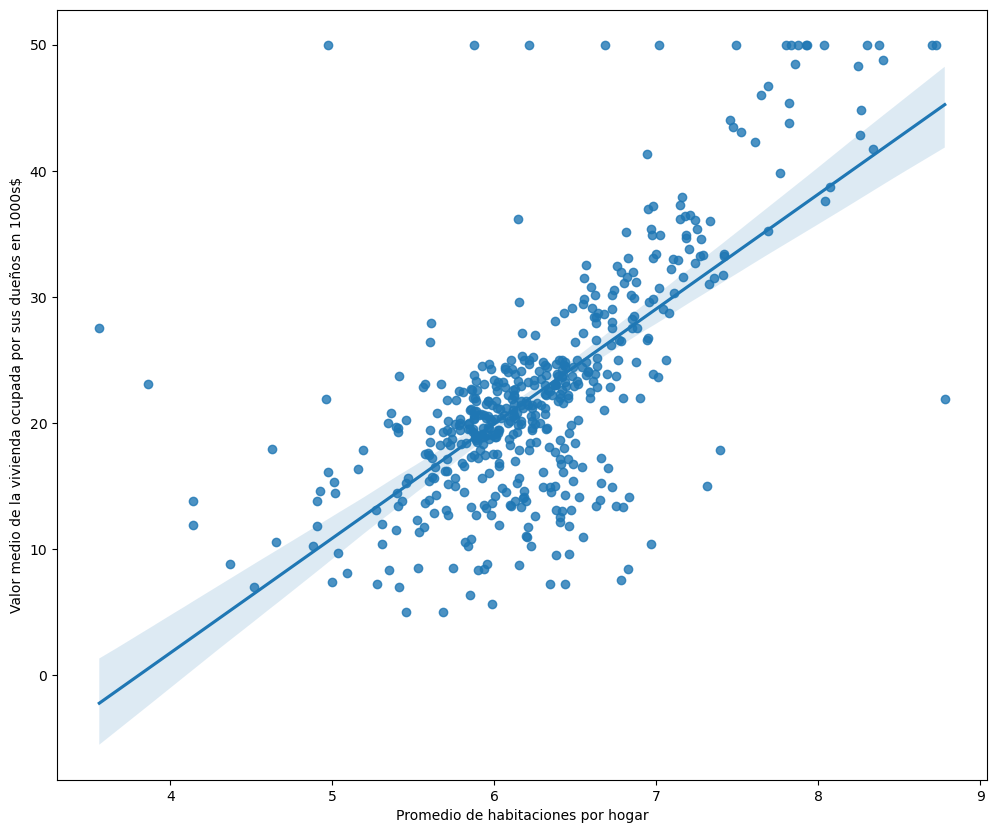

In [17]:
# Creamos el grafico de dispersion con la linea de regresion ajustada
plt.figure(figsize=(12,10))
# Se dibujan los puntos reales y la linea del modelo
sns.regplot(x=x, y=y)
# Nombre de los ejes
plt.xlabel('Promedio de habitaciones por hogar')
plt.ylabel('Valor medio de la vivienda ocupada por sus dueños en 1000s$')
plt.show()

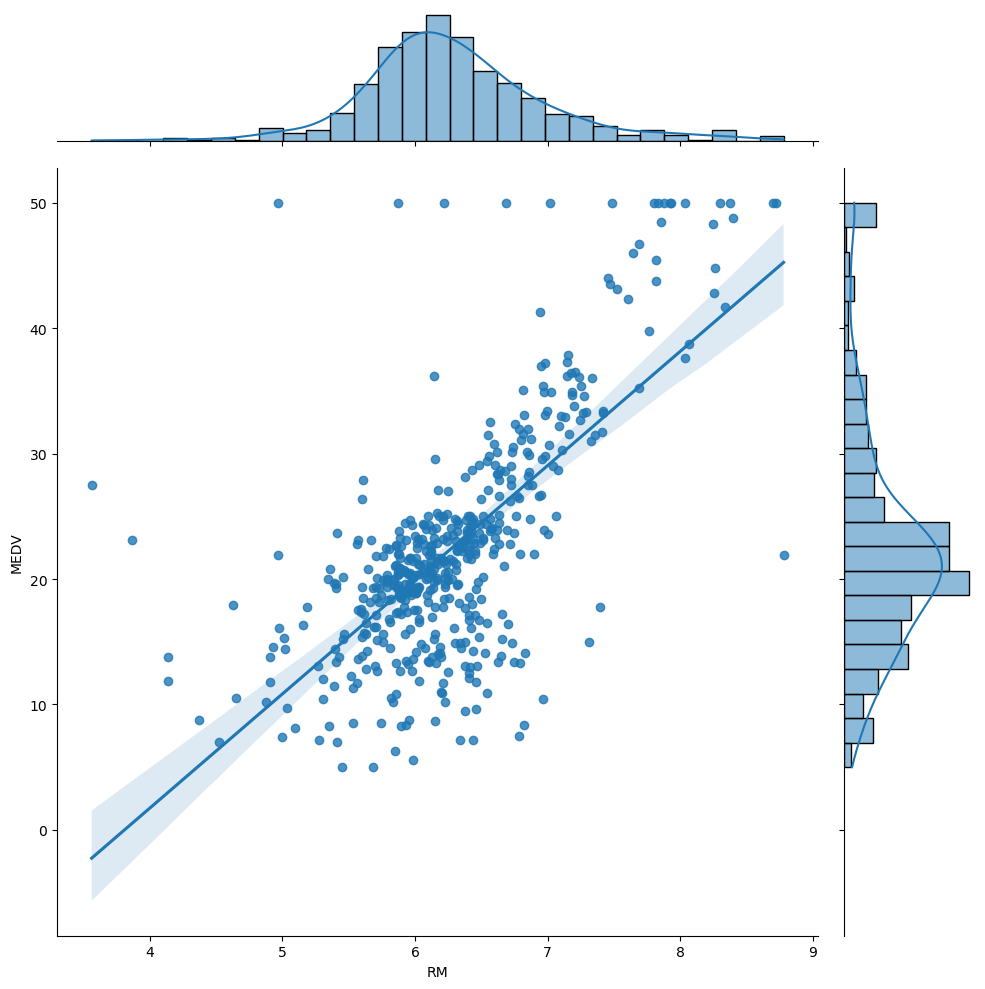

In [18]:
# Creamos un gráfico conjunto (jointplot) para visualizar la relación entre dos variables:
# 'RM' (número promedio de habitaciones por vivienda) y 'MEDV' (valor medio de la vivienda).
# Este gráfico incluye:
# - Un gráfico de dispersión (scatter plot) en el centro para ver cómo se relacionan las dos variables.
# - Una línea de regresión ajustada automáticamente ('kind="reg"'), que nos muestra la tendencia lineal entre ambas.
# - Histogramas en los márgenes superior y derecho, que muestran la distribución individual de cada variable.
# 'height=10' controla el tamaño general del gráfico (en pulgadas aproximadamente)
sns.jointplot(x = 'RM', y = 'MEDV', data = df, kind = 'reg', height = 10)
plt.show()

In [19]:
# Vamos a realizar una prediccion con el modelo ajustado
# Pasamos el numero de habitaciones que queremos predecir. Recordar hacer el reshape para pasar de array a matriz
model.predict(np.array([5]).reshape(-1,1))
# El modelo predice que el coste de la vivienda de 5 habitaciones seria de 10.83992413

array([10.83992413])

Basicos de la API Scikit-Learn

Comunmente, los pasos para la utilizacion de la API son los siguientes (se explicara mas a detalle cada paso en las secciones siguientes)

1-. Elegir una clase de modelo importando el estimador apropiado desde Scikit-Learn.
    from sklearn.linear_model import LinearRegression

2-. Creas un objeto del modelo con los parámetros que quieres (si no pasas nada, usa los valores por defecto).
    model = LinearRegression()

3-. Organiza los datos en una matriz de características y un vector objetivo.
    X = df[['RM', 'LSTAT', 'PTRATIO']]  # matriz de características
    y = df['MEDV']                      # vector objetivo

4-. Ajustar el modelo a tus datos llamando al metodo fit() de la instancia.
    model.fit(x=x, y=y)

5-. Aplicar el modelo en nuevos datos:
    - Para el aprendizaje supervisado -> A menudo predecimos etiquetas para datos desconocidos usando el método predict().
    - Para el aprendizaje sin supervision -> A menudo transformamos o inferimos propiedades de los datos usando los métodos transform() o predict()

ROBUST REGRESSION
tipo de regresión diseñada para ser resistente a valores atípicos (outliers) y violaciones de supuestos en los datos.

🧠 ¿Qué problema soluciona?
En regresión lineal clásica, el modelo:
Minimiza el error cuadrático (MSE).
Es muy sensible a outliers: un solo punto muy extremo puede desviar la línea.

✅ ¿Qué hace la regresión robusta?
Usa métodos alternativos que no se ven tan afectados por valores extremos.
Busca ajustar la mayoría de los datos sin dejarse arrastrar por unos pocos puntos raros.

Random Sample Consensus (RANSAC) Algorithm

Cada iteración realiza los siguientes pasos:

1-. Seleccionar min_samples muestras aleatorias del conjunto de datos original y comprobar si ese subconjunto es válido (ver is_data_valid).

2-. Ajustar un modelo al subconjunto aleatorio (base_estimator.fit) y verificar si el modelo estimado es válido (ver is_model_valid).

3-. Clasificar todos los datos como inliers (válidos) o outliers (atípicos), calculando los residuos del modelo estimado 
(base_estimator.predict(x) - y). Todos los datos cuya diferencia absoluta (residuo) sea menor que el residual_threshold se consideran inliers.

4-. Guardar el modelo ajustado como el mejor modelo si el número de inliers es el máximo observado hasta el momento. En caso de que el modelo actual tenga el mismo número de inliers que el mejor anterior, solo se considerará como el mejor si además tiene una mejor puntuación (score).

In [20]:
x = df['RM'].values.reshape(-1,1) # Variable independiente
y = df['MEDV'].values # Variable a predecir

In [21]:
from sklearn.linear_model import RANSACRegressor # Importacion del modelo de regresion

In [22]:
ransac = RANSACRegressor() # Creamos una instancia del modelo

In [24]:
ransac.fit(x, y) # Pasamos los datos para entrenar al modelo

RANSACRegressor()

In [25]:
inlier_mask = ransac.inlier_mask_ # Mascara booleana con puntos considerados validos
outlier_mask = np.logical_not(inlier_mask) # Mascara inversa identifica los valores outliers

In [27]:
np.arange(0, 40, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [28]:
line_x = np.arange(3, 10, 1) # Valores de entrada para graficar la recta
line_y_ransac = ransac.predict(line_x.reshape(-1, 1)) # Predicción de Y para esos valores de X

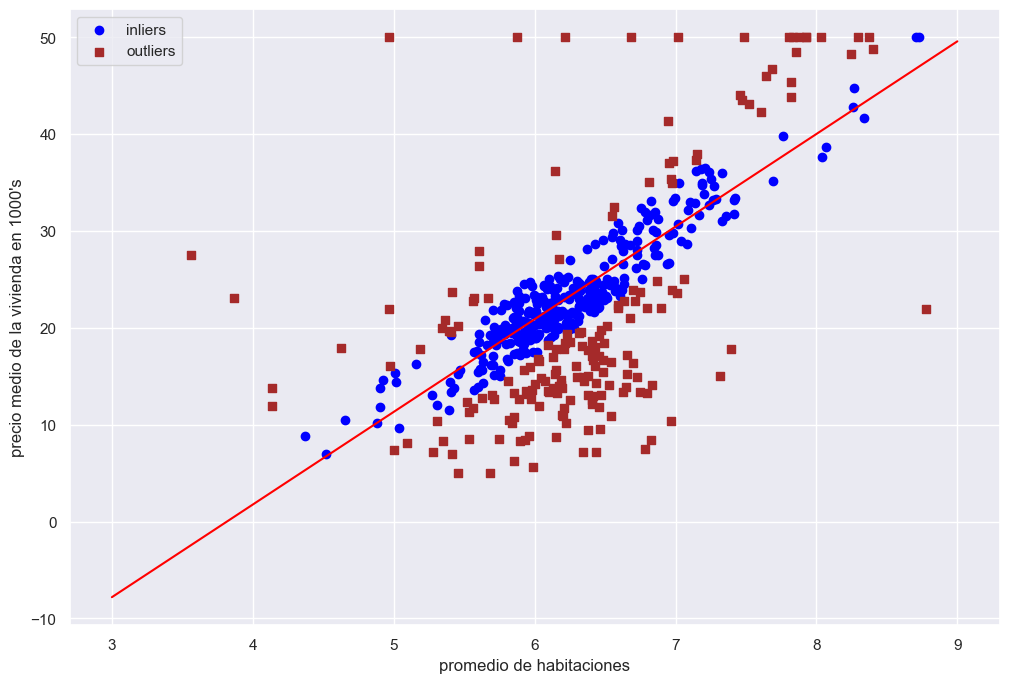

In [31]:
# Establecemos el estilo del gráfico para que se vea más claro en el notebook
sns.set(style='darkgrid', context='notebook')

# Creamos una figura de 12x8 pulgadas para visualizar cómodamente
plt.figure(figsize=(12, 8))

# Dibujamos los puntos considerados "inliers" (válidos) por el modelo RANSAC
# - x[inlier_mask] y y[inlier_mask] seleccionan solo los puntos válidos
# - c='blue': color azul
# - marker='o': marcador circular
# - label='inliers': para la leyenda
plt.scatter(x[inlier_mask], y[inlier_mask], c='blue', marker='o', label='inliers')

# Dibujamos los puntos considerados "outliers" (atípicos) por RANSAC
# - c='brown': color marrón
# - marker='s': marcador cuadrado
plt.scatter(x[outlier_mask], y[outlier_mask], c='brown', marker='s', label='outliers')

# Dibujamos la línea de regresión ajustada por RANSAC
# - line_x contiene los valores del eje X
# - line_y_ransac contiene las predicciones del modelo
plt.plot(line_x, line_y_ransac, color='red')

# Etiqueta para el eje X
plt.xlabel('Promedio de habitaciones por vivienda (RM)')

# Etiqueta para el eje Y
plt.ylabel('Precio medio de la vivienda en miles de dólares (MEDV)')

# Mostramos una leyenda en la esquina superior izquierda del gráfico
plt.legend(loc='upper left')

# Mostramos el gráfico completo
plt.show()


In [32]:
ransac.estimator_.coef_

array([9.56172774])

In [34]:
ransac.estimator_.intercept_

-36.48456621815885

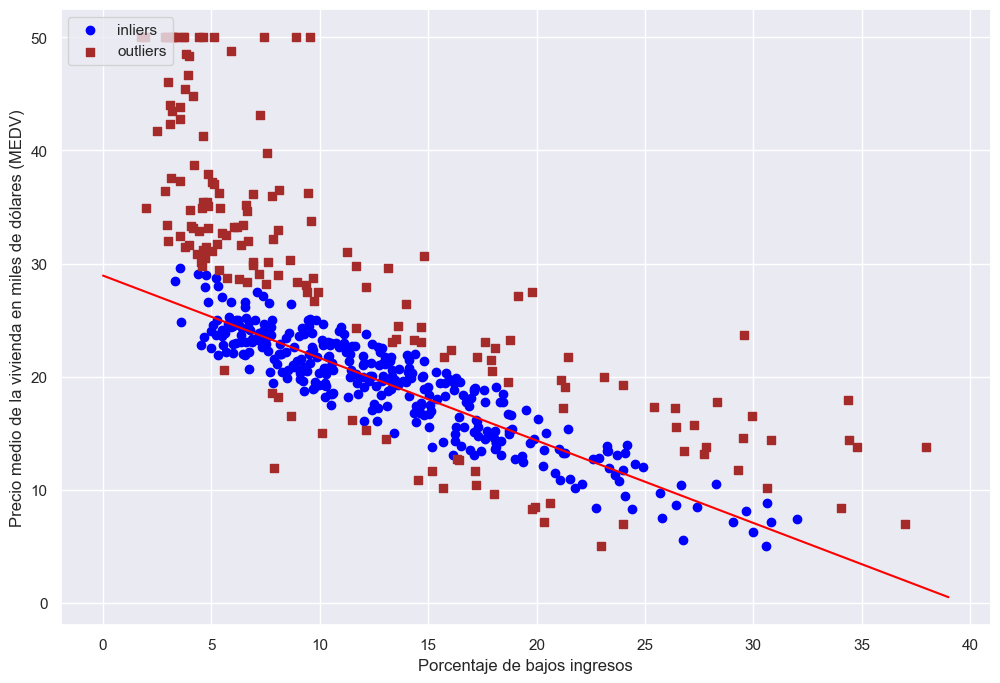

In [35]:
x = df['LSTAT'].values.reshape(-1,1) # Variable independiente
y = df['MEDV'].values # Variable a predecir

ransac.fit(x, y) # Pasamos los datos para entrenar al modelo

inlier_mask = ransac.inlier_mask_ # Mascara booleana con puntos considerados validos
outlier_mask = np.logical_not(inlier_mask) # Mascara inversa identifica los valores outliers

line_x = np.arange(0, 40, 1) # Valores de entrada para graficar la recta
line_y_ransac = ransac.predict(line_x.reshape(-1, 1)) # Predicción de Y para esos valores de X

# Establecemos el estilo del gráfico para que se vea más claro en el notebook
sns.set(style='darkgrid', context='notebook')

# Creamos una figura de 12x8 pulgadas para visualizar cómodamente
plt.figure(figsize=(12, 8))

# Dibujamos los puntos considerados "inliers" (válidos) por el modelo RANSAC
# - x[inlier_mask] y y[inlier_mask] seleccionan solo los puntos válidos
# - c='blue': color azul
# - marker='o': marcador circular
# - label='inliers': para la leyenda
plt.scatter(x[inlier_mask], y[inlier_mask], c='blue', marker='o', label='inliers')

# Dibujamos los puntos considerados "outliers" (atípicos) por RANSAC
# - c='brown': color marrón
# - marker='s': marcador cuadrado
plt.scatter(x[outlier_mask], y[outlier_mask], c='brown', marker='s', label='outliers')

# Dibujamos la línea de regresión ajustada por RANSAC
# - line_x contiene los valores del eje X
# - line_y_ransac contiene las predicciones del modelo
plt.plot(line_x, line_y_ransac, color='red')

# Etiqueta para el eje X
plt.xlabel('Porcentaje de bajos ingresos')

# Etiqueta para el eje Y
plt.ylabel('Precio medio de la vivienda en miles de dólares (MEDV)')

# Mostramos una leyenda en la esquina superior izquierda del gráfico
plt.legend(loc='upper left')

# Mostramos el gráfico completo
plt.show()

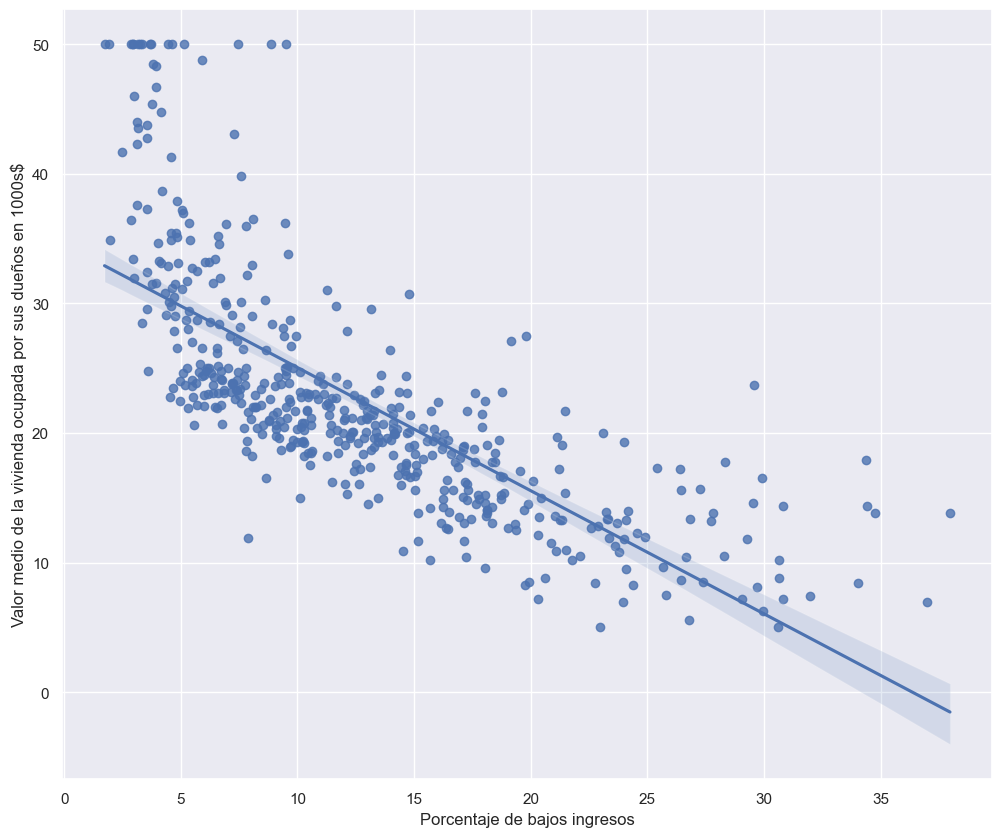

In [36]:
# Seleccion de las variables
# Reshape necesario, debido a que se pasa un array pero Scikit espera una matriz (aunque sea de una columna)
x = df['LSTAT'].values.reshape(-1,1)
# Variable objetivo a predecir
y = df['MEDV'].values
# Crearcion de instancia del modelo
model = LinearRegression()
# Ajustamos el modelo con nuestros datos
model.fit(x,y)
# Mostramos el coeficiente (pendiente de la recta)
model.coef_
# Mostramos el intercepto (valor donde la linea cruza el eje Y)
model.intercept_
# Creamos el grafico de dispersion con la linea de regresion ajustada
plt.figure(figsize=(12,10))
# Se dibujan los puntos reales y la linea del modelo
sns.regplot(x=x, y=y)
# Nombre de los ejes
plt.xlabel('Porcentaje de bajos ingresos')
plt.ylabel('Valor medio de la vivienda ocupada por sus dueños en 1000s$')
plt.show()

PERFORMANCE EVALUATION OF REGRESSION MODEL

In [38]:
# Funcion para dividir los datos en conjuntos de entrenamiento y de test
from sklearn.model_selection import train_test_split

In [39]:
# Seleccionamos todas las varibales de la tabla menos la ultima como variables predictorias
x = df.iloc[:, :-1].values
# Seleccionamos la variable a predecir
y = df['MEDV'].values

In [46]:
# Dividimos los datos en 20% para test y el 80% para entrenar al modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Cuando se ejecuta la funcion train_test_split, la separacion de datos se hace de manera aleatoria, con el atributo random_state se elimina la aleatoriedad, de forma
    # que cualquier persona que corra el codigo obtendra los mismos datos. Ademas haciendo uso de un for, podemos generar diferenter modelos con los mismos
    # datos, ya que modemos modificar el tipo de separacion (seed)

In [47]:
# Creamos instancia del modelo de regresion
lr = LinearRegression()

In [48]:
# Entrenamos el modelo con el 80% datos que hemos separado anteriormente
lr.fit(x_train, y_train)

LinearRegression()

In [49]:
# Prediccion sobre los datos de entrenamiento
y_train_pred = lr.predict(x_train)

In [50]:
# Prediccion sobre los datos de test, datos que el modelo no ha visto
y_test_pred = lr.predict(x_test)

METODO DE EVALUACION 1 -> ANALISIS RESIDUAL

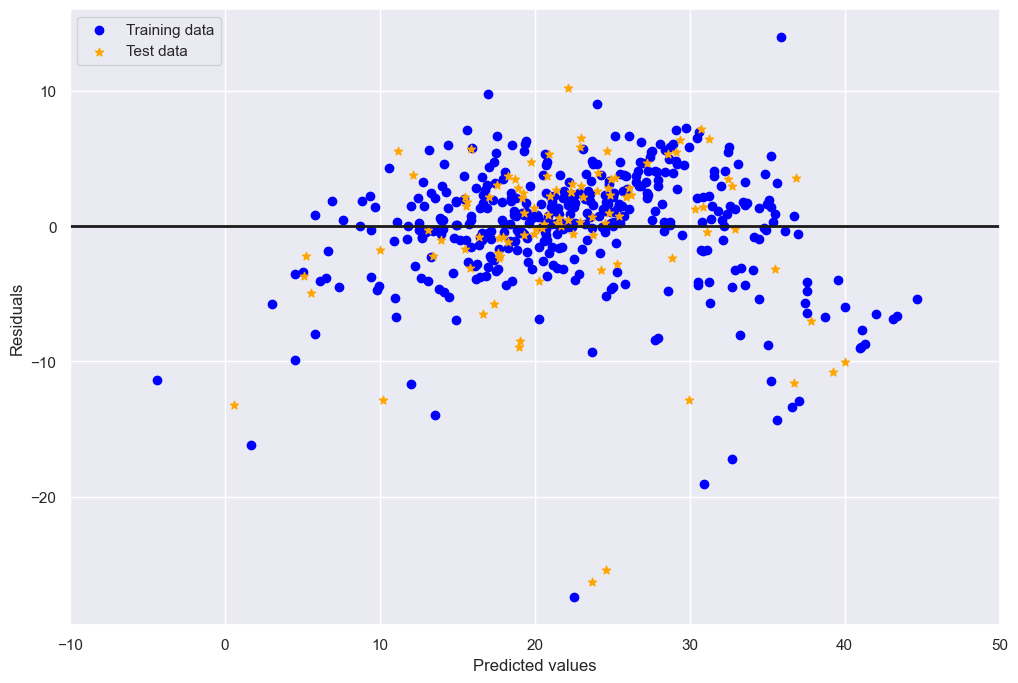

In [56]:
# Marcamos las dimensiones de la figura
plt.figure(figsize = (12, 8))
# Mostramos los residuos del entrenamiento -> residuos = valor predicho - valor real, es decir la diferencia entre lo que se predice y la realiadad
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
# Mostramos los residuos del test -> residuos = valor predicho - valor real, es decir la diferencia entre lo que se predice y la realiadad
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = '*', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
# Dibuja una linea en y = 0, indicando el punto donde las predicciones son perfectas
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
plt.xlim([-10, 50])
plt.show()

METODO DE EVALUACION 2 -> MEAN SQUARE ERROR (MSE) / 

Representa el error promedio que comete el modelo, y le da mas peso a los errores grandes (ya que se eleva al cuadrado la suma de todos los errores
    del conjunto de datos)
Se usa para encontrar los mejores valores posibles para los parámetros del modelo, probando muchas combinaciones y evaluando cada una varias 
    veces con diferentes divisiones de los datos.
Util para comparar diferentes modelos de regresion

In [57]:
from sklearn.metrics import mean_squared_error

In [60]:
# Calculamos cuan lejos estan en promedio las predicciones de los valores reales
mean_squared_error(y_train, y_train_pred)
# Cuanto menor el numero mejor. Nos da el margen de error al cuadrado, por lo que hay que hayar la raiz cuadrada

19.326470203585725

In [59]:
mean_squared_error(y_test, y_test_pred)

33.44897999767653

In [64]:
# Hayamos el margen de error correcto de los datos entrenados
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_train)
# En 1000s de $

4.396188144698282


In [65]:
# Hayamos el margen de error correcto de los datos test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmse_test)
# En 1000s de $

5.783509315085135


METODO DE EVALUACION 3 -> COEFICIENTE DE DETERMINACION, R^2

SSE -> sumatorio de los errores al cuadrado (lo que el modelo se equivoca)
SST -> sumatorio de los cuadrados de los errores (variabilidad total de los datos)

In [66]:
from sklearn.metrics import r2_score

In [67]:
# Te dice qué tan bien se ajustó el modelo a los datos de entrenamiento, usando una escala estándar de calidad
r2_score(y_train, y_train_pred)

0.7730135569264234

In [68]:
# Mide qué tan bien el modelo, entrenado con los datos de entrenamiento, logra predecir los datos nuevos (de prueba)
r2_score(y_test, y_test_pred)

0.5892223849182507

COMO LUCE UN MODELO CERCANO A LA PERFECCION?

<function matplotlib.pyplot.show(close=None, block=None)>

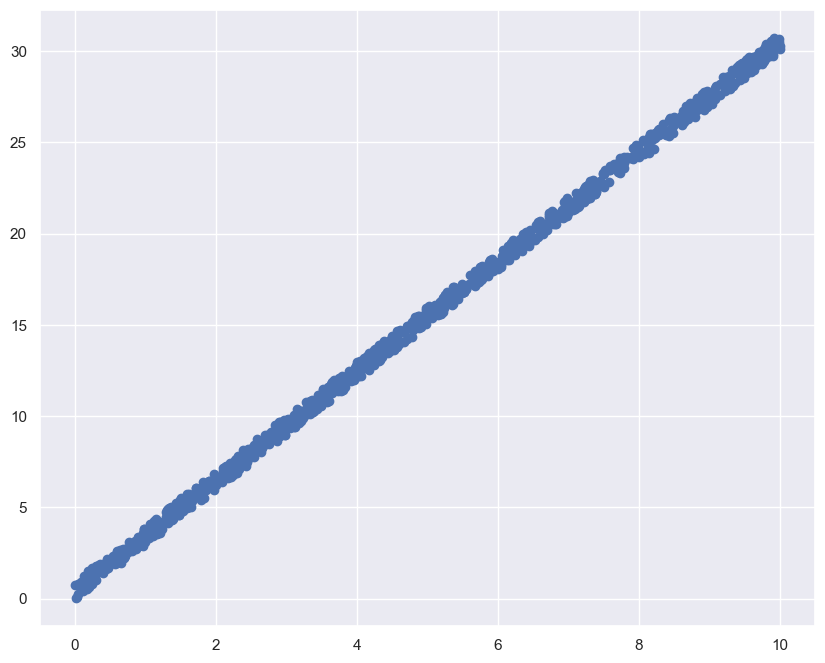

In [69]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.rand(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.show

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x_train.reshape(-1,1), y_train)

y_train_pred = model.predict(x_train.reshape(-1,1))
y_test_pred = model.predict(x_test.reshape(-1,1))

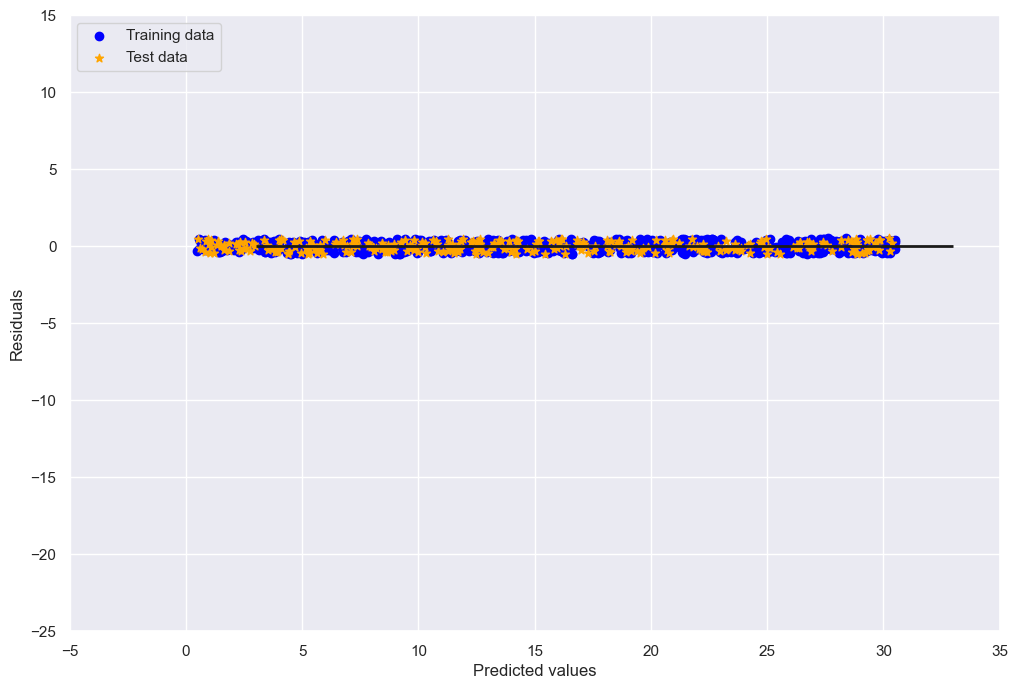

In [79]:
# Marcamos las dimensiones de la figura
plt.figure(figsize = (12, 8))
# Mostramos los residuos del entrenamiento -> residuos = valor predicho - valor real, es decir la diferencia entre lo que se predice y la realiadad
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
# Mostramos los residuos del test -> residuos = valor predicho - valor real, es decir la diferencia entre lo que se predice y la realiadad
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = '*', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
# Dibuja una linea en y = 0, indicando el punto donde las predicciones son perfectas
plt.hlines(y = 0, xmin = 3, xmax = 33, lw = 2, color = 'k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

In [80]:
# Calculamos cuan lejos estan en promedio las predicciones de los valores reales
print(mean_squared_error(y_train, y_train_pred))
# Cuanto menor el numero mejor. Nos da el margen de error al cuadrado, por lo que hay que hayar la raiz cuadrada
print(mean_squared_error(y_test, y_test_pred))
# Hayamos el margen de error correcto de los datos entrenados
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_train)
# En 1000s de $
# Hayamos el margen de error correcto de los datos test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmse_test)
# En 1000s de $

0.07720241296682179
0.08286859547643853
0.2778532219838773
0.2878690596025188


In [81]:
# Te dice qué tan bien se ajustó el modelo a los datos de entrenamiento, usando una escala estándar de calidad
print(r2_score(y_train, y_train_pred))
# Mide qué tan bien el modelo, entrenado con los datos de entrenamiento, logra predecir los datos nuevos (de prueba)
print(r2_score(y_test, y_test_pred))

0.9989825274529716
0.9989224051666524
